In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from matplotlib_venn import venn3
from scipy.cluster.hierarchy import linkage, leaves_list

In [101]:
top_miRNA = ['hsa-miR-4783-3p', 'hsa-miR-1307-3p', 'hsa-miR-3184-5p', 'hsa-miR-3178', 'hsa-miR-6857-3p', 'hsa-miR-4749-5p', 'hsa-miR-4462', 'hsa-miR-6722-3p', 'hsa-miR-3130-3p', 'hsa-miR-1229-3p', 'hsa-miR-4511', 'hsa-miR-6715b-5p', 'hsa-miR-139-3p', 'hsa-miR-3975']
print(f'Length of top_miRNA: {len(top_miRNA)}')

Length of top_miRNA: 14


In [102]:
top_miRNA = pd.DataFrame(top_miRNA, columns=['miRNA'])
top_miRNA.head()

,miRNA
0,hsa-miR-4783-3p
1,hsa-miR-1307-3p
2,hsa-miR-3184-5p
3,hsa-miR-3178
4,hsa-miR-6857-3p


In [103]:
# print all miRNA separated by a new line character
print('\n'.join(top_miRNA['miRNA'].values))

hsa-miR-4783-3p
hsa-miR-1307-3p
hsa-miR-3184-5p
hsa-miR-3178
hsa-miR-6857-3p
hsa-miR-4749-5p
hsa-miR-4462
hsa-miR-6722-3p
hsa-miR-3130-3p
hsa-miR-1229-3p
hsa-miR-4511
hsa-miR-6715b-5p
hsa-miR-139-3p
hsa-miR-3975


In [104]:
gene_targets = pd.read_csv('./predictive_miRNA_genes.csv')

In [105]:
print(f'Length of gene_targets: {len(gene_targets)}')
print(f'Columns of gene_targets: {gene_targets.columns}')

Length of gene_targets: 1412
Columns of gene_targets: Index(['Gene Symbol', 'p-value', 'FDR', 'Odd ratio', 'Number of interactions',
       'microRNA 1', 'microRNA 2', 'microRNA 3', 'microRNA 4'],
      dtype='object')


In [106]:
print(f'gene_targets columns: {gene_targets.columns}')

# print genes sepearated by a new line character
print('\n'.join(gene_targets['Gene Symbol'].values))

gene_targets columns: Index(['Gene Symbol', 'p-value', 'FDR', 'Odd ratio', 'Number of interactions',
       'microRNA 1', 'microRNA 2', 'microRNA 3', 'microRNA 4'],
      dtype='object')
BARHL1
ABCB5
ABCC5
ABCC9
ABHD14B
ABL1
ACLY
ACOT7
ACTG1
ADAMTS14
ADIRF
ADM
ADPRHL2
AHCYL1
AIF1L
AK2
AKR1D1
AKR7A2
AKT1S1
ALDOC
ALOX15
ALS2
ALX1
AMDHD2
AMH
ANKRD42
ANKRD52
AP2S1
APBB3
APOBEC3A
APOBEC3C
ARHGAP42
ARHGEF18
ARHGEF2
ARL6IP4
ARL8A
ASB6
ASXL3
ATG14
ATOX1
ATP5A1
ATP6V1E1
ATP8B4
B4GALNT4
B4GALT1
BAIAP3
BANP
BAP1
BAZ2A
BCAM
BCAR1
BET1L
BICC1
BRD2
BRSK1
C10orf55
C12orf49
C14orf180
C16orf45
C16orf87
C17orf51
C1orf229
C20orf27
C3orf36
C7orf65
C8orf17
CACNA1H
CALM3
CALML3
CALR
CAPZA2
CASZ1
CAVIN4
CBARP
CC2D1B
CCDC106
CCDC122
CCDC142
CCDC170
CCDC171
CCDC32
CCDC36
CCDC59
CCND3
CCS
CDC37
CDK15
CDK16
CDKN3
CENPBD1
CEP126
CEP152
CEP350
CES4A
CFAP73
CHCHD2
CHCHD3
CHTF8
CIC
CKS2
CLCN5
CLCN7
CLLU1OS
CLPX
CLSTN3
COMMD9
COX6C
COX8A
CPLX1
CPNE1
CPT1B
CRISP3
CRX
CRY2
CSRP1
CTCF
CTDNEP1
CTNNBL1
CTTNBP2NL
CUL4B
CXC

In [107]:
genecards = pd.ExcelFile('./genecards_predictive.xlsx')

diseases = genecards.parse('Diseases', skiprows=18)
print(f'diseases columns: {diseases.columns}')

pathways = genecards.parse('Pathways', skiprows=18)
print(f'pathways columns: {pathways.columns}')

diseases columns: Index(['Score', 'Name', 'Disease categories', '# Total Genes',
       '# Matched Genes', 'Matched Genes (Symbols)', 'Evidence URL',
       'Genetic Associations', 'Matched Genes for Genetic Associations',
       'Diferentially Expressed Genes in Tissue Samples',
       'Genes Matched to Differentially Expressed Genes'],
      dtype='object')
pathways columns: Index(['Score', 'SuperPath Name', '# SuperPath Total Genes',
       '# SuperPath Matched Genes', 'Matched Genes (Symbols)', 'Evidence URL'],
      dtype='object')


In [108]:
G = nx.Graph()

# Add miRNA nodes to the graph without 'hsa-' prefix
for mirna in top_miRNA['miRNA']:
    G.add_node(mirna.replace('hsa-miR-', ''), type='miRNA')

filtered_diseases = diseases[diseases['Name'].isin(['Retinitis Pigmentosa', 'Autism', 'Prostate Cancer'])]

for index, row in filtered_diseases.iterrows():
    disease_name = row['Name']
    matched_genes = row['Matched Genes (Symbols)'].split(', ')
    for mirna in top_miRNA['miRNA']:
        mirna_no_prefix = mirna.replace('hsa-miR-', '')
        targeted_genes = gene_targets[(gene_targets['microRNA 1'] == mirna) |
                                      (gene_targets['microRNA 2'] == mirna) |
                                      (gene_targets['microRNA 3'] == mirna) |
                                      (gene_targets['microRNA 4'] == mirna)]['Gene Symbol'].values
        common_genes = set(targeted_genes).intersection(set(matched_genes))
        if common_genes:
            if not G.has_node(disease_name):
                G.add_node(disease_name, type='disease', label=disease_name)
            G.add_edge(mirna_no_prefix, disease_name, weight=len(common_genes))

In [109]:
miRNA_sizes = {mirna.replace('hsa-miR-', ''): len(gene_targets[(gene_targets['microRNA 1'] == mirna) |
                                                          (gene_targets['microRNA 2'] == mirna) |
                                                          (gene_targets['microRNA 3'] == mirna) |
                                                          (gene_targets['microRNA 4'] == mirna)]) * 10 for mirna in top_miRNA['miRNA']}

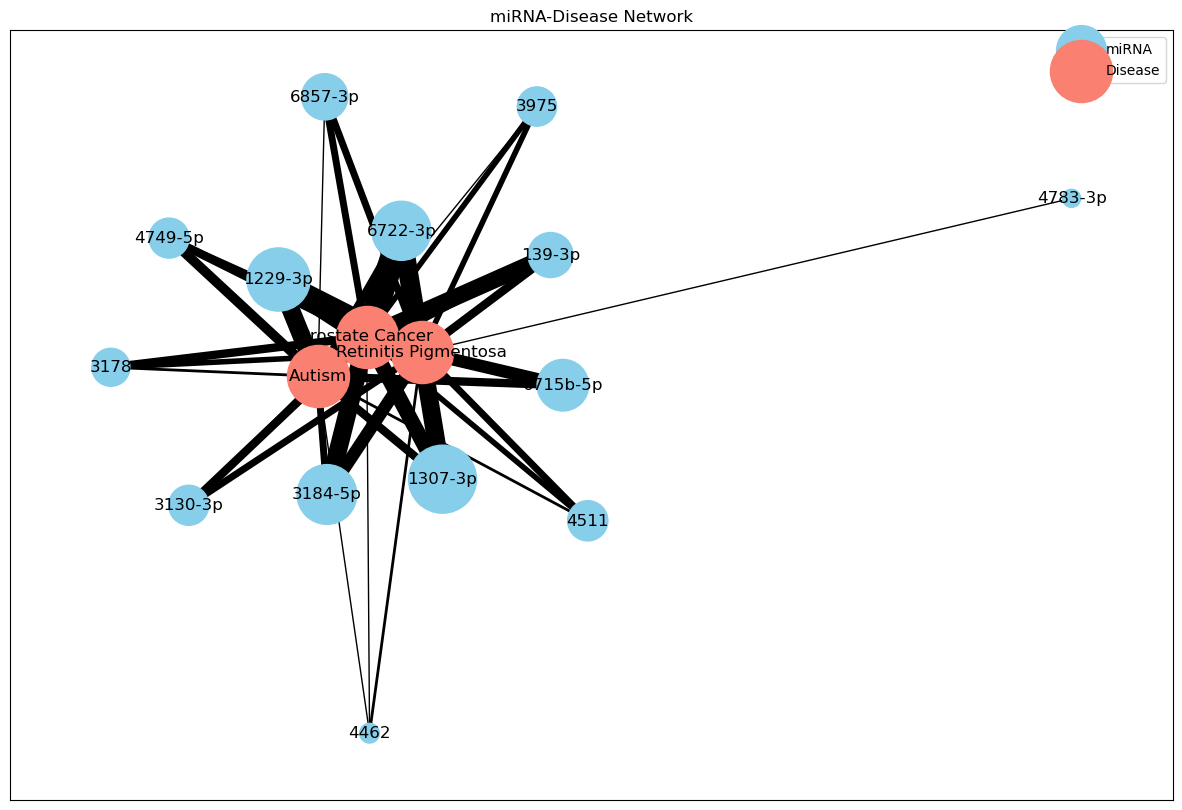

Network exported to miRNA_disease_network.graphml


In [110]:
disease_size_factor = 4

subgraph_nodes = set(filtered_diseases['Name'])
for mirna in top_miRNA['miRNA']:
    mirna_no_prefix = mirna.replace('hsa-miR-', '')
    if any(neighbor in subgraph_nodes for neighbor in G.neighbors(mirna_no_prefix)):
        subgraph_nodes.add(mirna_no_prefix)
        subgraph_nodes.update(G.neighbors(mirna_no_prefix))

subG = G.subgraph(subgraph_nodes).copy()

# Add node size attribute
for node in subG.nodes():
    if subG.nodes[node]['type'] == 'miRNA':
        subG.nodes[node]['size'] = miRNA_sizes.get(node, 100)
    else:
        subG.nodes[node]['size'] = 500 * disease_size_factor  # Scaled size for diseases

# Add edge weight attribute
for u, v, d in subG.edges(data=True):
    d['width'] = d['weight']

# Draw the subgraph
pos = nx.spring_layout(subG)
plt.figure(figsize=(15, 10))

nx.draw_networkx_nodes(subG, pos, nodelist=[n for n in subG.nodes if subG.nodes[n]['type'] == 'miRNA'], 
                       node_size=[miRNA_sizes.get(mirna, 100) for mirna in subG.nodes if subG.nodes[mirna]['type'] == 'miRNA'],
                       node_color='skyblue', label='miRNA')
nx.draw_networkx_nodes(subG, pos, nodelist=[n for n in subG.nodes if subG.nodes[n]['type'] == 'disease'], 
                       node_size=500 * disease_size_factor, node_color='salmon', label='Disease')

edges = subG.edges(data=True)
nx.draw_networkx_edges(subG, pos, edgelist=edges, width=[d['weight'] for (u, v, d) in edges])

nx.draw_networkx_labels(subG, pos)

plt.legend(scatterpoints=1)
plt.title("miRNA-Disease Network")
plt.show()

# Export the subgraph to GraphML with attributes
nx.write_graphml(subG, "miRNA_disease_network.graphml")
print("Network exported to miRNA_disease_network.graphml")

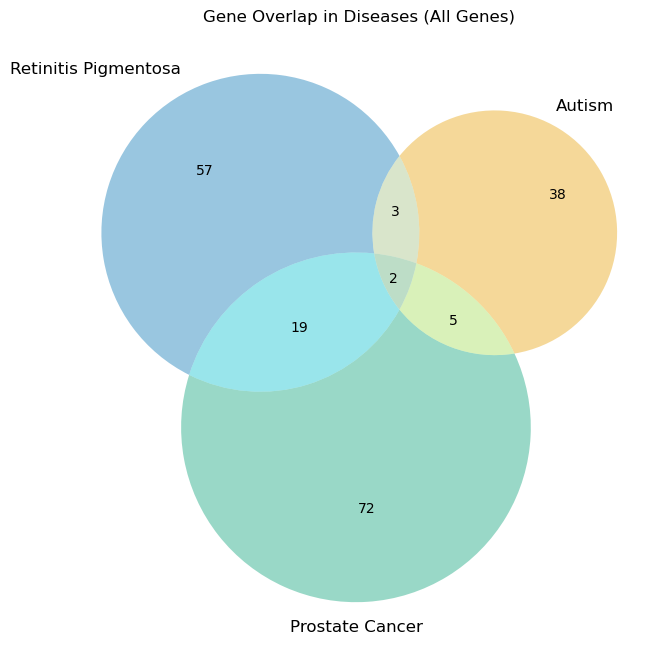

          Prostate Cancer  Retinitis Pigmentosa  Autism  sum
CALR                    1                     1       0    2
CDK4                    1                     1       0    2
CDKN1A                  1                     1       0    2
CLU                     1                     1       0    2
CREB1                   1                     1       0    2
CSNK2A1                 1                     1       0    2
ELAVL1                  1                     1       0    2
FGFR1                   1                     1       0    2
GAPDH                   1                     1       0    2
BCL2L1                  1                     1       0    2
HSP90AB1                1                     1       0    2
HSPA4                   1                     1       0    2
ICAM1                   1                     1       0    2
IGF1R                   1                     1       0    2
JUN                     1                     1       0    2
MDM2                    

/var/folders/c_/rs13jmts3nbf9xfm917mh9p80000gn/T/ipykernel_52654/1817547935.py:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gene_matrix = gene_matrix.fillna(0)


In [112]:

# Extract all genes targeted by the top miRNAs
targeted_genes = set()
for mirna in top_miRNA['miRNA']:
    targeted_genes.update(gene_targets[(gene_targets['microRNA 1'] == mirna) |
                                       (gene_targets['microRNA 2'] == mirna) |
                                       (gene_targets['microRNA 3'] == mirna) |
                                       (gene_targets['microRNA 4'] == mirna)]['Gene Symbol'].values)

# Extract matched genes for each disease
retinitis_genes = set(filtered_diseases[filtered_diseases['Name'] == 'Retinitis Pigmentosa']['Matched Genes (Symbols)'].values[0].split(', '))
autism_genes = set(filtered_diseases[filtered_diseases['Name'] == 'Autism']['Matched Genes (Symbols)'].values[0].split(', '))
prostate_cancer_genes = set(filtered_diseases[filtered_diseases['Name'] == 'Prostate Cancer']['Matched Genes (Symbols)'].values[0].split(', '))

# Generate Venn Diagram with all genes
plt.figure(figsize=(8, 8))
venn3([retinitis_genes, autism_genes, prostate_cancer_genes], ('Retinitis Pigmentosa', 'Autism', 'Prostate Cancer'),
      set_colors=('#0072B2', '#E69F00', '#009E73'))
plt.title("Gene Overlap in Diseases (All Genes)")
plt.show()

# Find genes overlapping in at least two disease groups and targeted by miRNAs
overlapping_genes_targeted = (
    (prostate_cancer_genes & retinitis_genes) |
    (prostate_cancer_genes & autism_genes) |
    (retinitis_genes & autism_genes)
) & targeted_genes

# Create a binary matrix for the overlapping targeted genes with diseases as columns
gene_matrix = pd.DataFrame(index=sorted(overlapping_genes_targeted), columns=['Prostate Cancer', 'Retinitis Pigmentosa', 'Autism'])
gene_matrix = gene_matrix.fillna(0)

# Fill in the binary matrix for the overlapping targeted genes
for gene in overlapping_genes_targeted:
    gene_matrix.loc[gene, 'Retinitis Pigmentosa'] = 1 if gene in retinitis_genes else 0
    gene_matrix.loc[gene, 'Autism'] = 1 if gene in autism_genes else 0
    gene_matrix.loc[gene, 'Prostate Cancer'] = 1 if gene in prostate_cancer_genes else 0

# Add a 'sum' column to count the number of diseases a gene is associated with
gene_matrix['sum'] = gene_matrix.sum(axis=1)

# Sort the matrix by the 'sum' column in descending order
gene_matrix = gene_matrix.sort_values(by='sum', ascending=False)

# Remove the 'sum' column for clustering
gene_matrix_no_sum = gene_matrix.drop(columns='sum')

# Perform hierarchical clustering on the binary matrix
linkage_matrix = linkage(gene_matrix_no_sum, method='average', metric='euclidean')

# Get the order of genes based on clustering
ordered_index = leaves_list(linkage_matrix)
ordered_gene_matrix = gene_matrix.iloc[ordered_index]

# Save the sorted and clustered binary matrix to Excel
ordered_gene_matrix.to_excel('./overlapping_targeted_genes_matrix_sorted_clustered.xlsx', sheet_name='Gene Overlap')

# Print the sorted and clustered binary matrix
print(ordered_gene_matrix)